In [2]:
%env CUDA_LAUNCH_BLOCKING=1
import torch
from torch import nn
from torch.utils.data import DataLoader
from src.data.data_synth import DNFDataset
from src.model.fuzzy import logic
from src.model.fuzzy.layer import FuzzyDNF
from src.plot import plot_loss, plot_bit_density
from src.dnf import format_dnf, format_vars
import matplotlib.pyplot as plt

env: CUDA_LAUNCH_BLOCKING=1


In [3]:
%%capture
from tqdm.notebook import tqdm
tqdm().pandas()

In [4]:
device = 'cpu'
#device = 'cuda'

In [10]:
def train_dnf(model: FuzzyDNF, dataloader, lr):
    optimizer = torch.optim.Adam(model.parameters(), lr)
    loss_fn = torch.nn.BCELoss()

    seen = 0
    items = []
    obs_losses = []
    props = []
    dnf_strs = []
    prev_dnf_params = None

    for batch, (X, y) in tqdm(enumerate(dataloader), total=len(dataloader)):
        X = X.to(device)
        y = y.to(device)
        pred = torch.squeeze(model(X))
        #print(pred.shape, y.shape)
        loss = loss_fn(pred, y)
        #print(pred, y)

        # Optimise NN model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        """
        dnf_params = model.harden_params()
        if prev_dnf_params == None or not all(map(torch.equal, prev_dnf_params, dnf_params)):
            dnf_strs.append(model.params_to_str())
            prev_dnf_params = tuple(map(lambda t: t.clone().detach(), dnf_params))
        """
        seen += len(X)
        items.append(seen)
        obs_losses.append(loss.item())
        props.append(y.mean())
        
    return torch.tensor(items), torch.tensor(obs_losses), torch.tensor(props), dnf_strs

In [3]:
dnf_dataset = DNFDataset(10, 100, 0.5, 2, 0.5)
for X, y in dnf_dataset:
    print(format_vars(X))
    print("Given formula:")
    print(format_dnf(dnf_dataset.conj_signs, dnf_dataset.conj_weights))
    print("Produces:")
    print(str(y) + "\n")

( ¬0 ∧ ¬1 ∧ ¬2 ∧ 3 ∧ ¬4 ∧ 5 ∧ 6 ∧ 7 ∧ 8 ∧ ¬9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( 0 ∧ 1 ∧ 2 ∧ ¬3 ∧ 4 ∧ ¬5 ∧ ¬6 ∧ 7 ∧ 8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( ¬0 ∧ ¬1 ∧ ¬2 ∧ ¬3 ∧ ¬4 ∧ ¬5 ∧ ¬6 ∧ ¬7 ∧ ¬8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( 0 ∧ 1 ∧ 2 ∧ 3 ∧ 4 ∧ 5 ∧ 6 ∧ ¬7 ∧ 8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( 0 ∧ ¬1 ∧ 2 ∧ 3 ∧ 4 ∧ 5 ∧ 6 ∧ ¬7 ∧ ¬8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( 0 ∧ 1 ∧ 2 ∧ ¬3 ∧ 4 ∧ 5 ∧ ¬6 ∧ 7 ∧ 8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( ¬0 ∧ 1 ∧ 2 ∧ ¬3 ∧ ¬4 ∧ 5 ∧ 6 ∧ ¬7 ∧ ¬8 ∧ ¬9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(1.)

( 0 ∧ 1 ∧ 2 ∧ 3 ∧ ¬4 ∧ 5 ∧ 6 ∧ 7 ∧ 8 ∧ 9 )
Given formula:
( 1 ∧ ¬2 ∧ 4 ∧ 7 ∧ ¬8 )
∨ ( 1 ∧ 5 ∧ ¬8 )
Produces:
tensor(0.)

( ¬0 ∧ 1 ∧

In [ ]:
class FuzzyNN(nn.Module):
    def __init__(self, in_features):
        self.model = nn.Sequential(
            FuzzyDNF(in_features, 16, )
        )

  0%|          | 0/3907 [00:00<?, ?it/s]

[]


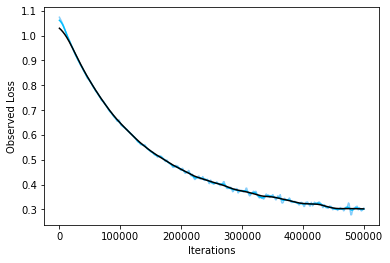

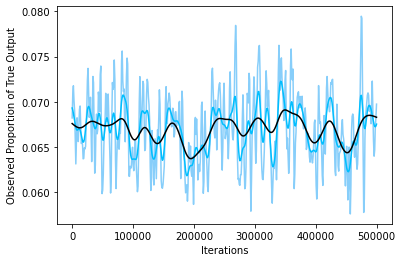

In [24]:
dnf_dim = 10
dnf_dataset = DNFDataset(dnf_dim, 500000, 0.5, 2, 0.5)
dnf_dataloader = DataLoader(dnf_dataset, batch_size=128, shuffle=True)

dnf_model = FuzzyDNF(dnf_dim, 1, 20, logic_system=logic.ProductLogic)
dnf_model.to(device)

dnf_items, dnf_losses, dnf_props, dnf_strs = train_dnf(dnf_model, dnf_dataloader, lr=5e-4)

print(dnf_strs)

plot_loss(dnf_items, dnf_losses, ylabel='Observed Loss', approx=True)
plot_loss(dnf_items, dnf_props, ylabel='Observed Proportion of True Output', approx=True)

In [8]:
class PerceptronDNF(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

  0%|          | 0/1563 [00:00<?, ?it/s]

[]


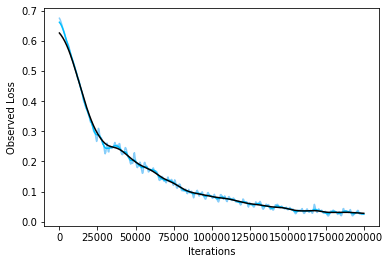

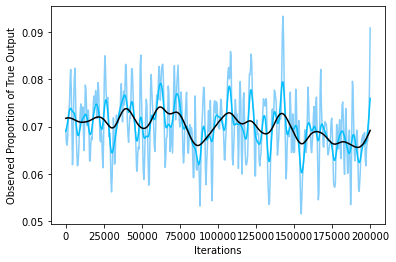

In [21]:
dnf_dim = 10
dnf_dataset = DNFDataset(dnf_dim, 200000, 0.5, 2, 0.5)
dnf_dataloader = DataLoader(dnf_dataset, batch_size=128, shuffle=True)

dnf_model = PerceptronDNF(dnf_dim)
dnf_model.to(device)

dnf_items, dnf_losses, dnf_props, dnf_strs = train_dnf(dnf_model, dnf_dataloader, lr=5e-4)

print(dnf_strs)

plot_loss(dnf_items, dnf_losses, ylabel='Observed Loss', approx=True)
plot_loss(dnf_items, dnf_props, ylabel='Observed Proportion of True Output', approx=True)

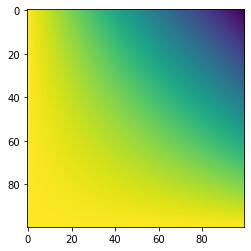

In [38]:
detail = 100
hmc_logic = logic.HamacherLogic(torch.tensor(2.0))
output = hmc_logic.residuum(torch.linspace(0, 1, detail).view(1, -1), torch.linspace(0, 1, detail).view(-1, 1))
plt.imshow(output)

In [8]:
dnf_model

FuzzyDNF()

In [9]:
dnf_dataset.conj_signs

tensor([[False,  True],
        [False, False],
        [ True,  True],
        [ True,  True],
        [False, False],
        [False, False],
        [ True, False],
        [ True,  True],
        [ True,  True],
        [False,  True]])

In [10]:
dnf_dataset.conj_weights

tensor([[False,  True],
        [ True, False],
        [ True,  True],
        [ True,  True],
        [ True, False],
        [False,  True],
        [False, False],
        [ True, False],
        [False, False],
        [False,  True]])

In [11]:
dnf_dataset.disj_weights

tensor([[1.],
        [1.]])

In [31]:
print(format_dnf(dnf_dataset.conj_signs, dnf_dataset.conj_weights))

( 1 ∧ ¬3 ∧ ¬4 ∧ ¬8 )
∨ ( ¬0 ∧ ¬1 ∧ ¬2 ∧ ¬3 ∧ 4 ∧ 5 ∧ 6 )


In [32]:
print(dnf_model.params_to_str())

DNF Feature 0:
( 0 ∧ 1 ∧ 2 ∧ ¬5 ∧ ¬6 ∧ 7 ∧ 9 )
∨ ( 0 ∧ ¬1 ∧ 2 ∧ 5 ∧ ¬6 ∧ 7 ∧ ¬9 )


In [43]:
print(dnf_model)

FuzzyDNF()
